In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import openweathermapy.core as owm
import random
import datetime
import seaborn as sns


# OWM API Key from config
from config import api_key

In [2]:
#OBSERVABLE TRENDS
#--> There is a corelation between latitude and temperature: Cities with negative and minor latitude, have warm weather.
#--> Cities close to The Equator (latitude 0), has more % humidity.
#--> Cities with higher temperatures, has also a high percentage of humidity

In [3]:
#CSV with cities from all the world
cities_df = pd.read_csv("Resources/worldcities.csv")
cities_df.head()

#In order to make a sample to cover all regions in the world, I didn' use coords because most of them are negative, 
#that's why I couldn't find a correct way to make groups with them.

#However, to cover all regions, I choose 3 cities from each country
cities_per_country = cities_df["Country"].value_counts()

cities_per_country_df = pd.DataFrame({"Num Cities":cities_per_country})

#Countries with at least 3 cities
selected_countries = cities_per_country_df[cities_per_country_df["Num Cities"].astype(int) > 3]
selected_countries.head()

,Num Cities
ru,4262
us,4170
ph,3752
in,2995
ro,2745


In [4]:
#This loops selects 3 random cities for each selected country

choices=[]
for index, row in selected_countries.iterrows():
    counter=0
    cities_country=[]
    cities_country_df=cities_df.loc[cities_df['Country']==index]
    cities_country=cities_country_df.City.unique()
     
    while counter < 3:
        
        try: 
            selection = random.choice(cities_country)
           
            if selection not in choices:
                choices.append(selection)
                counter=counter+1
                
        except ValueError:
            continue

In [5]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
#Creatinf a dataframe with selected cities
results_df= pd.DataFrame(choices,columns=['City'])

# Create blank columns in DataFrame 
results_df["Country"]=None
results_df["Temperature (C)"]=None
results_df["Humidity (%)"]=None
results_df["Cloudiness (%)"]=None
results_df["Wind Speed (mph)"]=None
results_df["Latitude"]=None
results_df["Longitude"]=None


# Counter
row_count = 0

for index,row in results_df.iterrows():
    #Printing log: City +URL
    city=row["City"]
    weather_data = requests.get(query_url + city)
    print(f"Now retrieving city # {row_count}: {city}")
          
    print(weather_data.url)
    row_count += 1

    try:
        weather_data = weather_data.json()
                    
        results_df.set_value(index,"City",city)
        results_df.set_value(index,"Country",weather_data["sys"]["country"])
        results_df.set_value(index,"Temperature (C)",weather_data["main"]["temp"])
        results_df.set_value(index,"Humidity (%)",weather_data["main"]["humidity"])
        results_df.set_value(index,"Cloudiness (%)",weather_data["clouds"]["all"])
        results_df.set_value(index,"Wind Speed (mph)",weather_data["wind"]["speed"])
        results_df.set_value(index,"Latitude", weather_data["coord"]["lat"])
        results_df.set_value(index,"Longitude", weather_data["coord"]["lon"])
    except:
        print("No weather results")
        continue
results_df.head()

Now retrieving city # 0: elektrostal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=elektrostal
Now retrieving city # 1: raditsa-krylovka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=raditsa-krylovka
Now retrieving city # 2: plotnikovo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=plotnikovo
Now retrieving city # 3: hammond
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hammond
Now retrieving city # 4: san luis
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=san%20luis
Now retrieving city # 5: marrero
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=marrero
Now retrieving city # 6: lingating
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc

Now retrieving city # 56: napajedla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=napajedla
Now retrieving city # 57: yaguacire
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=yaguacire
Now retrieving city # 58: las mercedes
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=las%20mercedes
Now retrieving city # 59: nueva granada
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nueva%20granada
Now retrieving city # 60: begijnendijk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=begijnendijk
Now retrieving city # 61: lontzen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=lontzen
Now retrieving city # 62: halle
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6

Now retrieving city # 112: la mitra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=la%20mitra
Now retrieving city # 113: nueva gorgona
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nueva%20gorgona
Now retrieving city # 114: abtenau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=abtenau
Now retrieving city # 115: hopfgarten
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hopfgarten
Now retrieving city # 116: bruck an der mur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bruck%20an%20der%20mur
Now retrieving city # 117: bosanski novi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bosanski%20novi
Now retrieving city # 118: mramor
http://api.openweathermap.org/data/2.5/w

Now retrieving city # 168: marijampole
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=marijampole
Now retrieving city # 169: vilnius
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vilnius
Now retrieving city # 170: utena
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=utena
Now retrieving city # 171: tupiza
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tupiza
Now retrieving city # 172: san matias
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=san%20matias
Now retrieving city # 173: san miguel
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=san%20miguel
Now retrieving city # 174: crna na koroskem
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece

Now retrieving city # 223: bogo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bogo
Now retrieving city # 224: tignere
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tignere
Now retrieving city # 225: jurmala
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=jurmala
Now retrieving city # 226: jaunjelgava
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=jaunjelgava
Now retrieving city # 227: ilukste
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ilukste
Now retrieving city # 228: hukuntsi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hukuntsi
Now retrieving city # 229: shakawe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metri

Now retrieving city # 279: pedernales
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=pedernales
Now retrieving city # 280: puerto plata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=puerto%20plata
Now retrieving city # 281: moca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=moca
Now retrieving city # 282: santa lucia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=santa%20lucia
Now retrieving city # 283: isla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=isla
Now retrieving city # 284: birgu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=birgu
Now retrieving city # 285: vukovar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&uni

Now retrieving city # 336: uige
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=uige
Now retrieving city # 337: camabatela
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=camabatela
Now retrieving city # 338: benguela
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=benguela
Now retrieving city # 339: glodeni
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=glodeni
Now retrieving city # 340: edinet
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=edinet
Now retrieving city # 341: comrat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=comrat
Now retrieving city # 342: phalombe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=p

Now retrieving city # 391: agadir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=agadir
Now retrieving city # 392: fez
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=fez
Now retrieving city # 393: gazojak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=gazojak
Now retrieving city # 394: turkmenabat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=turkmenabat
Now retrieving city # 395: gazanjyk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=gazanjyk
Now retrieving city # 396: kwaluseni
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kwaluseni
Now retrieving city # 397: bulembu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metri

Now retrieving city # 447: talas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=talas
Now retrieving city # 448: tokmak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tokmak
Now retrieving city # 449: batken
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=batken
Now retrieving city # 450: brokopondo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=brokopondo
Now retrieving city # 451: marienburg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=marienburg
Now retrieving city # 452: nieuw nickerie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nieuw%20nickerie
Now retrieving city # 453: ta khmau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0

Now retrieving city # 502: laborie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=laborie
Now retrieving city # 503: vieux fort
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vieux%20fort
Now retrieving city # 504: chateaubelair
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=chateaubelair
Now retrieving city # 505: kingstown
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kingstown
Now retrieving city # 506: dovers
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dovers
Now retrieving city # 507: old road
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=old%20road
No weather results
Now retrieving city # 508: carlisle
http://api.openweathermap.org/data/2.5/weather?appid=25

Now retrieving city # 558: doha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=doha
Now retrieving city # 559: kayfan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kayfan
No weather results
Now retrieving city # 560: bayan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bayan
Now retrieving city # 561: kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kloulklubed
Now retrieving city # 562: koror
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=koror
No weather results
Now retrieving city # 563: meyungs
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=meyungs
No weather results


,City,Country,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,elektrostal,RU,-16.66,77,0,2,55.79,38.44
1,raditsa-krylovka,RU,-11,61,0,5,53.32,34.36
2,plotnikovo,RU,-5,73,20,2,55.04,83.4
3,hammond,US,18.06,100,90,3.12,30.5,-90.46
4,san luis,AR,20.31,50,0,5.32,-33.3,-66.34


In [7]:
 # Save the DataFrame as a csv
results_df.to_csv("output/world_cities_weather_data.csv",
                     encoding="utf-8", index=False)


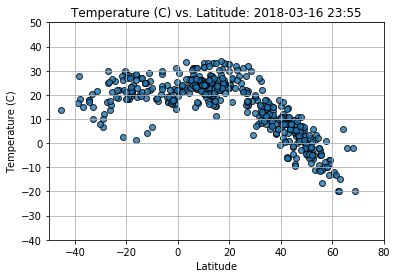

Using SEABORN


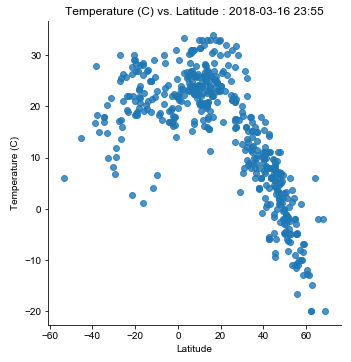

In [8]:
# Build a scatter plot for each data type
#"Temperature (C) vs. Latitude"

import datetime
now = datetime.datetime.now()
now=now.strftime("%Y-%m-%d %H:%M")

plt.scatter(results_df["Latitude"],results_df["Temperature (C)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(f"Temperature (C) vs. Latitude: {now}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.ylim([-40, 50])
plt.xlim([-50, 80])

# Save the figure
plt.savefig("output/Temperature_Lat.png")

# Show plot
plt.show()

print("Using SEABORN")
#Using Seaborn
sns.lmplot(x='Latitude', y='Temperature (C)', data=results_df,fit_reg=False)
plt.title(f"Temperature (C) vs. Latitude : {now}")
sns.set_style('whitegrid')

# Save the figure
plt.savefig("output/Temperature_Lat_SB.png")

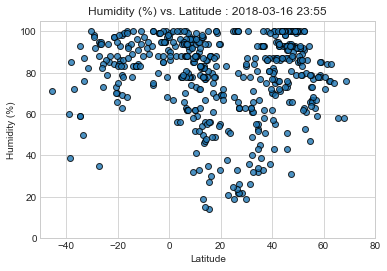

Using SEABORN


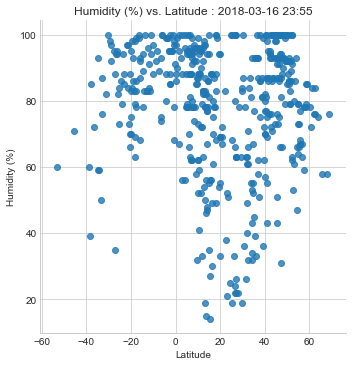

In [9]:
# Build a scatter plot for each data type
#"Humidity (%) vs. Latitude"

plt.scatter(results_df["Latitude"],results_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(f"Humidity (%) vs. Latitude : {now}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.ylim([0, 100+5])
plt.xlim([-50, 80])

# Save the figure
plt.savefig("output/Humidity_Lat.png")

# Show plot
plt.show()

print("Using SEABORN")
#Using Seaborn
sns.lmplot(x='Latitude', y='Humidity (%)', data=results_df,fit_reg=False)
plt.title(f"Humidity (%) vs. Latitude : {now}")
sns.set_style('whitegrid')

# Save the figure
plt.savefig("output/Humidity_Lat_SB.png")

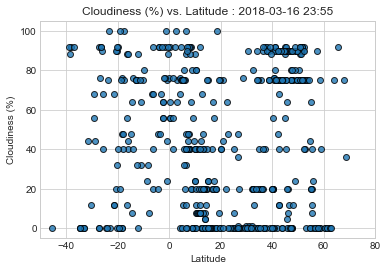

Using SEABORN


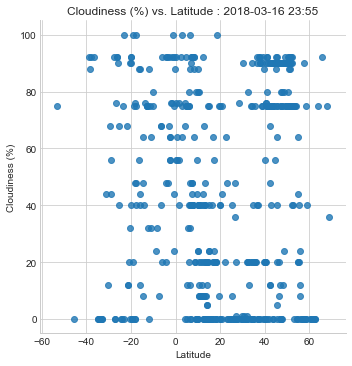

In [10]:
# Build a scatter plot for each data type
# Cloudiness (%) vs. Latitude

plt.scatter(results_df["Latitude"],results_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(f"Cloudiness (%) vs. Latitude : {now}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.ylim([0-5, 100+5])
plt.xlim([-50, 80])

# Save the figure
plt.savefig("output/Cloudiness_Lat.png")

# Show plot
plt.show()

print("Using SEABORN")
#Using Seaborn
sns.lmplot(x='Latitude', y='Cloudiness (%)', data=results_df,fit_reg=False)
plt.title(f"Cloudiness (%) vs. Latitude : {now}")
sns.set_style('whitegrid')

# Save the figure
plt.savefig("output/Cloudiness_Lat_SB.png")

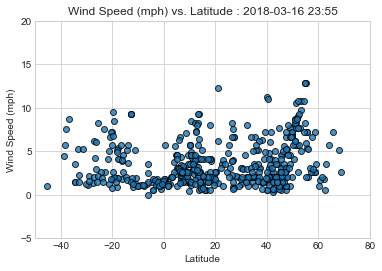

Using SEABORN


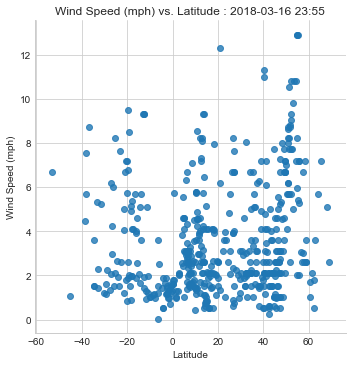

In [11]:
# Build a scatter plot for each data type
# Wind Speed (mph) vs. Latitude

plt.scatter(results_df["Latitude"],results_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title(f"Wind Speed (mph) vs. Latitude : {now}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.ylim([0-5, 20])
plt.xlim([-50, 80])


# Save the figure
plt.savefig("output/WindSpeed_Lat.png")

# Show plot
plt.show()

print("Using SEABORN")
#Using Seaborn
sns.lmplot(x='Latitude', y='Wind Speed (mph)', data=results_df,fit_reg=False)
plt.title(f"Wind Speed (mph) vs. Latitude : {now}")
sns.set_style('whitegrid')

# Save the figure
plt.savefig("output/WindSpeed_Lat_SB.png")
